In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


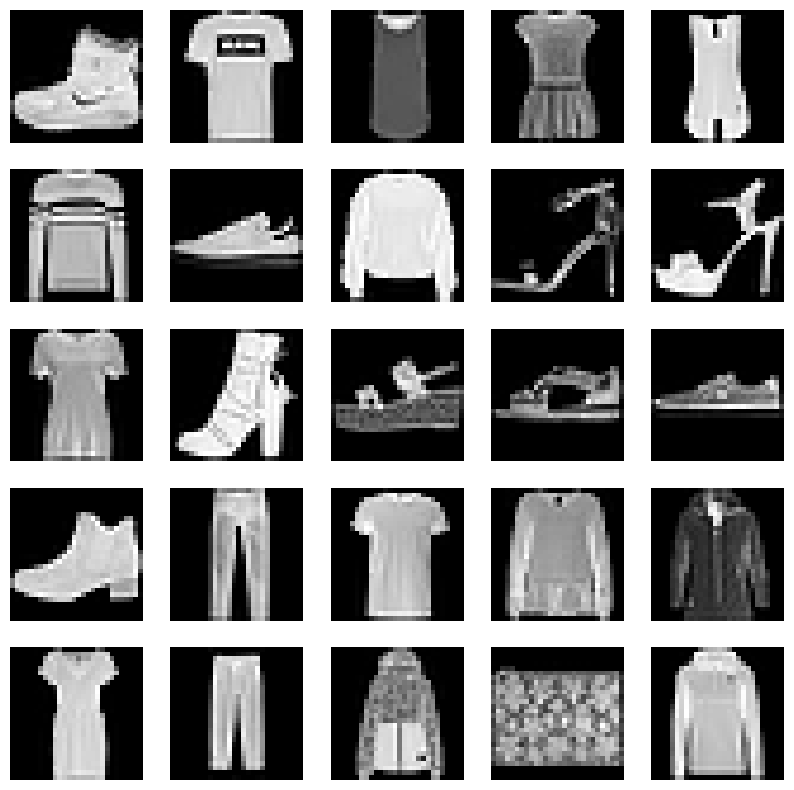

In [4]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()


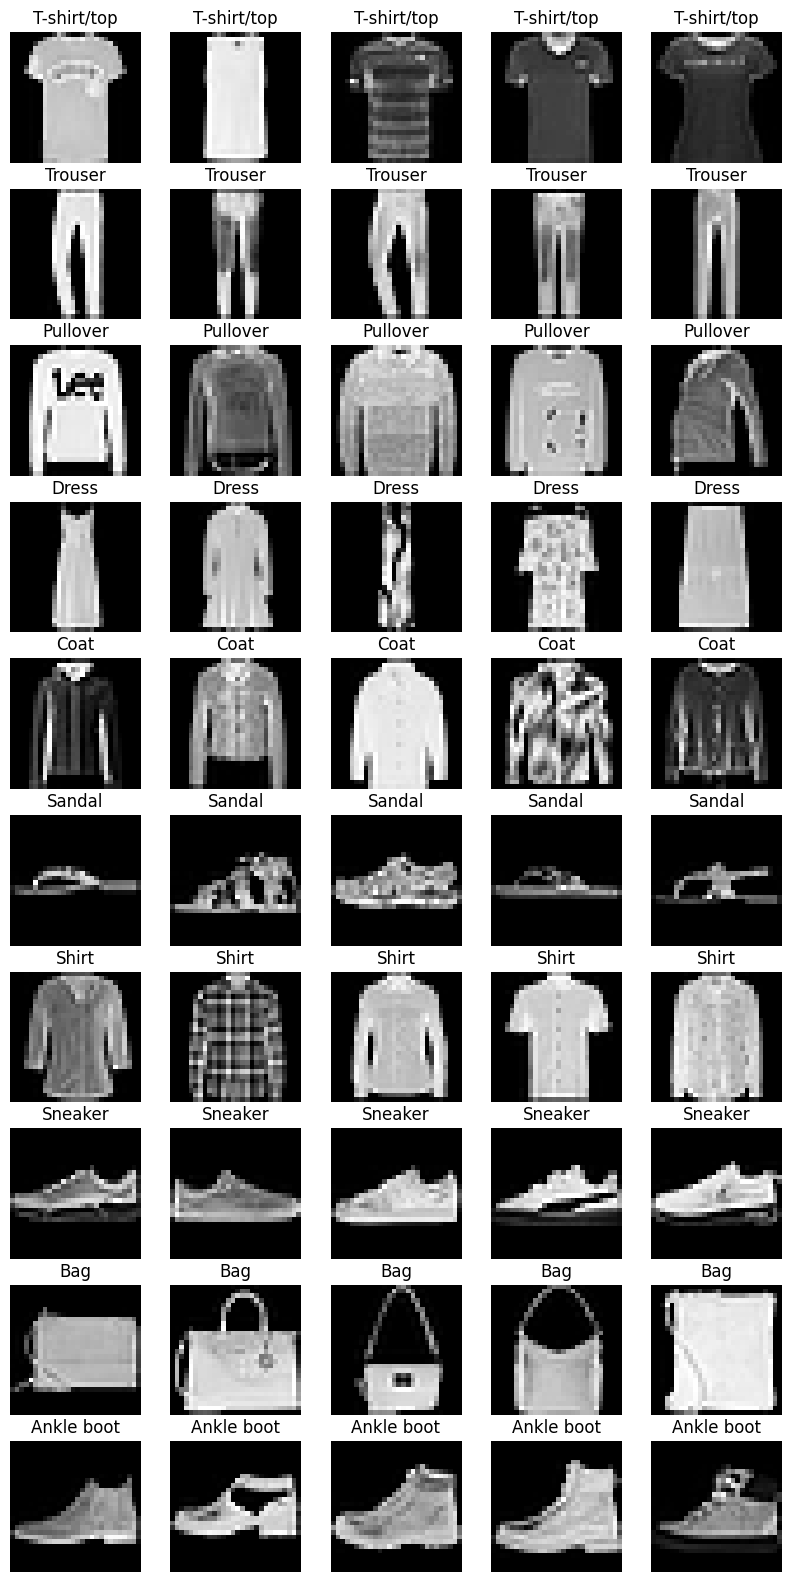

In [10]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display 5 images of each class
plt.figure(figsize=(10, 20))
for i in range(10):
    class_indices = np.where(test_labels == i)[0][:5]
    for j, index in enumerate(class_indices):
        plt.subplot(10, 5, i * 5 + j + 1)
        plt.imshow(test_images[index], cmap='gray')
        plt.title(class_names[i])
        plt.axis('off')
plt.show()

In [5]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64) #TRY BATCH SIZE 512 FOR ACCURATE RESULTS

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 63s 66ms/step - loss: 0.5414 - accuracy: 0.8019
Epoch 2/5
938/938 [==============================] - 49s 53ms/step - loss: 0.3374 - accuracy: 0.8773
Epoch 3/5
938/938 [==============================] - 49s 52ms/step - loss: 0.2935 - accuracy: 0.8928
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.2609 - accuracy: 0.9043
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.2727 - accuracy: 0.8978
Test accuracy: 0.8978000283241272


In [8]:
# Function to predict clothing category
def predict_clothing_category(image):
    # Preprocess the image
    image = np.expand_dims(image, axis=0)
    image = image.astype('float32') / 255
    # Make prediction
    prediction = model.predict(image)
    # Get the predicted class
    predicted_class = np.argmax(prediction)
    return predicted_class

In [16]:
# Example usage:
# Load an example image (replace this with your own image)
example_image_index = 4
example_image = test_images[example_image_index]

# Predict the category of the example image
predicted_class = predict_clothing_category(example_image)
predicted_class_name = class_names[predicted_class]
print('Predicted class:', predicted_class_name)

# # Display the example image
# plt.figure()
# plt.imshow(example_image.squeeze(),cmap='gray')
# plt.title(f'Predicted class: {predicted_class_name}')
# plt.axis('off')
# plt.show()

1/1 [==============================] - 0s 22ms/step
Predicted class: Sandal
